# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [32]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
# save api_keys information:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}&units={units}&appid={weather_api_key}&q="

In [34]:
# Performing a weather check on city using a series of API calls:

# Setting list for the loop call:
city_data = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []


# Print to logger:
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Creating counters for printing log:
record_count = 1
set_count = 1


# Looping through all the cities in our list and performing a request:
for i, city in enumerate(cities):
       
    # Create the endpoint query_url with each city:
    city_url = query_url + city
    
    
    # Grouping cities in sets of 50 for with counters we set for printing log:
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
      
    # Printing records with set numbers and counters:
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Adding 1 to the record count for printing:
    record_count += 1

    # Running the API request for each of the cities 
    # (Using try & except)
    try:
        
        # Make request and store in json
        response = requests.get(city_url).json()
        
        
        city_data.append(response["name"])
        city_lat.append(response["coord"]["lat"])
        city_lng.append(response["coord"]["lon"])
        city_max_temp.append(response["main"]["temp_max"])
        city_humidity.append(response["main"]["humidity"])
        city_clouds.append(response["clouds"]["all"])
        city_wind.append(response["wind"]["speed"])
        city_country.append(response["sys"]["country"])
        city_date.append(response["dt"])
        
        # Suspension time to prevent api from getting locked
        time.sleep(2)
        
    # Handle exceptions for experienced error, skip the city:
    except:
        # Append null values
        print("City not found. Skipping...")
        pass 
    
# Include a print log of each city as it'sbeing processed (with the city number and city name)              
# Print when data loading is complete: 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 1 | japura
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | port macquarie
Processing Record 9 of Set 1 | auki
Processing Record 10 of Set 1 | kununurra
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | port hardy
Processing Record 13 of Set 1 | lasa
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | chuy
Processing Record 16 of Set 1 | amderma
City not found. Skipping...
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | airai
Processing Record 22 of Set 1 | n

Processing Record 35 of Set 4 | kushiro
Processing Record 36 of Set 4 | khatanga
Processing Record 37 of Set 4 | piacabucu
Processing Record 38 of Set 4 | trinidad
Processing Record 39 of Set 4 | aberdeen
Processing Record 40 of Set 4 | aksu
Processing Record 41 of Set 4 | longyearbyen
Processing Record 42 of Set 4 | colares
Processing Record 43 of Set 4 | isla mujeres
Processing Record 44 of Set 4 | carlisle
Processing Record 45 of Set 4 | vardo
Processing Record 46 of Set 4 | gold coast
Processing Record 47 of Set 4 | ventspils
Processing Record 48 of Set 4 | lohja
Processing Record 49 of Set 4 | novo oriente
Processing Record 0 of Set 5 | gayeri
Processing Record 1 of Set 5 | tebingtinggi
Processing Record 2 of Set 5 | chilca
Processing Record 3 of Set 5 | san rafael del sur
Processing Record 4 of Set 5 | semey
Processing Record 5 of Set 5 | winnemucca
Processing Record 6 of Set 5 | sioux lookout
Processing Record 7 of Set 5 | rio gallegos
Processing Record 8 of Set 5 | korla
Proces

Processing Record 27 of Set 8 | carnarvon
Processing Record 28 of Set 8 | ilulissat
Processing Record 29 of Set 8 | launceston
Processing Record 30 of Set 8 | ankazoabo
Processing Record 31 of Set 8 | itoman
Processing Record 32 of Set 8 | ancud
Processing Record 33 of Set 8 | ayan
Processing Record 34 of Set 8 | esperance
Processing Record 35 of Set 8 | fortuna
Processing Record 36 of Set 8 | fort nelson
Processing Record 37 of Set 8 | sambava
Processing Record 38 of Set 8 | kombotion
City not found. Skipping...
Processing Record 39 of Set 8 | yarada
Processing Record 40 of Set 8 | igarka
Processing Record 41 of Set 8 | divnomorskoye
Processing Record 42 of Set 8 | eskisehir
Processing Record 43 of Set 8 | brae
Processing Record 44 of Set 8 | svetlaya
Processing Record 45 of Set 8 | carmen
Processing Record 46 of Set 8 | halalo
City not found. Skipping...
Processing Record 47 of Set 8 | ust-barguzin
Processing Record 48 of Set 8 | walvis bay
Processing Record 49 of Set 8 | flinders
Pr

Processing Record 16 of Set 12 | huarmey
Processing Record 17 of Set 12 | bor
Processing Record 18 of Set 12 | constitucion
Processing Record 19 of Set 12 | doha
Processing Record 20 of Set 12 | kleck
City not found. Skipping...
Processing Record 21 of Set 12 | jaypur
Processing Record 22 of Set 12 | kudahuvadhoo
Processing Record 23 of Set 12 | khipro
Processing Record 24 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 25 of Set 12 | pangody
Processing Record 26 of Set 12 | kargasok
Processing Record 27 of Set 12 | acapulco
Processing Record 28 of Set 12 | tigil
Processing Record 29 of Set 12 | labuhan
Processing Record 30 of Set 12 | perelyub
Processing Record 31 of Set 12 | havre-saint-pierre
Processing Record 32 of Set 12 | gorontalo
Processing Record 33 of Set 12 | bowen
Processing Record 34 of Set 12 | marfino
Processing Record 35 of Set 12 | margate
Processing Record 36 of Set 12 | miyoshi
Processing Record 37 of Set 12 | kattivakkam
Processing Record 38 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
# Creating new dataframe for cities data:
city_data_df ={
    "City": city_data, 
    "Lat": city_lat, 
    "Lng": city_lng, 
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country,
     "Date": city_date}

weather_df = pd.DataFrame(city_data_df)
weather_df.count()

City          544
Lat           544
Lng           544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

In [36]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,George Town,5.41,100.34,84.20,78,40,10.42,MY,1603594024
1,Japura,-0.32,102.35,80.19,80,99,1.34,ID,1603593839
2,Mahébourg,-20.41,57.70,69.80,88,75,12.75,MU,1603593918
3,Vaini,-21.20,-175.20,73.40,88,75,12.75,TO,1603594047
4,Busselton,-33.65,115.33,82.00,29,74,7.20,AU,1603593921


In [37]:
# Exporting the city data to .csv file:

weather_df.to_csv("../output_data/city_weather.csv", index=False, header=True)

In [38]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,18.979761,18.689375,59.760257,74.617647,54.408088,7.519559,1.603595e+09
std,33.585108,88.811725,19.911257,19.593872,38.913688,5.366427,3.499479e+02
min,-54.800000,-179.170000,7.230000,13.000000,0.000000,0.000000,1.603594e+09
25%,-8.950000,-58.935000,46.000000,64.000000,13.750000,3.360000,1.603594e+09
50%,22.785000,22.495000,63.850000,80.000000,66.500000,6.150000,1.603595e+09
75%,47.737500,95.120000,75.990000,90.000000,91.250000,10.275000,1.603595e+09
max,78.220000,178.420000,98.600000,100.000000,100.000000,38.160000,1.603595e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [39]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,George Town,5.41,100.34,84.20,78,40,10.42,MY,1603594024
1,Japura,-0.32,102.35,80.19,80,99,1.34,ID,1603593839
2,Mahébourg,-20.41,57.70,69.80,88,75,12.75,MU,1603593918
3,Vaini,-21.20,-175.20,73.40,88,75,12.75,TO,1603594047
4,Busselton,-33.65,115.33,82.00,29,74,7.20,AU,1603593921


In [40]:
# Inspecting the data for cities where the humidity > 100%: 

weather_df.loc[weather_df["Humidity"] >= 100]["Humidity"].count()

19

In [41]:
# Filtered data by humidity:
filtered_df = weather_df.loc[weather_df['Humidity'] < 100]

In [42]:
len(filtered_df)

525

In [43]:
# Checking the weather_df and comparing it to the filtered_df:
len(weather_df)

544

In [44]:
filtered_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,5.250000e+02
mean,18.826514,19.454457,60.088076,73.699048,53.914286,7.601619,1.603595e+09
std,33.432079,89.729954,19.967161,19.329626,38.958070,5.385958,3.483829e+02
min,-54.800000,-179.170000,7.230000,13.000000,0.000000,0.000000,1.603594e+09
25%,-9.010000,-59.800000,46.400000,63.000000,13.000000,3.400000,1.603594e+09
50%,22.290000,24.070000,64.400000,79.000000,63.000000,6.240000,1.603595e+09
75%,47.340000,99.840000,76.170000,88.000000,91.000000,10.290000,1.603595e+09
max,78.220000,178.420000,98.600000,99.000000,100.000000,38.160000,1.603595e+09


In [45]:
#  Get the indices of cities that have humidity over 100%.
over_100 = weather_df[weather_df.Humidity > 100].index
over_100

Int64Index([], dtype='int64')

In [46]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df
for x in over_100:
    clean_city_data = weather_df.drop([x])
clean_city_data    

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,George Town,5.41,100.34,84.20,78,40,10.42,MY,1603594024
1,Japura,-0.32,102.35,80.19,80,99,1.34,ID,1603593839
2,Mahébourg,-20.41,57.70,69.80,88,75,12.75,MU,1603593918
3,Vaini,-21.20,-175.20,73.40,88,75,12.75,TO,1603594047
4,Busselton,-33.65,115.33,82.00,29,74,7.20,AU,1603593921
...,...,...,...,...,...,...,...,...,...
539,Marfino,55.70,37.38,44.01,80,40,8.95,RU,1603595204
540,Margate,51.38,1.39,54.00,91,100,3.00,GB,1603595113
541,Miyoshi City,35.08,137.07,70.00,52,75,12.75,JP,1603595208
542,Kattivākkam,13.22,80.32,84.20,83,40,2.24,IN,1603595211


In [47]:
# Extract relevant fields from the cleaned dataframe
lat = clean_city_data .Lat
max_temp = clean_city_data ["Max Temp"]
humid = clean_city_data.Humidity
cloud = clean_city_data.Cloudiness
wind = clean_city_data['Wind Speed']

# Export the clean_city_data into a csv:
clean_city_data.to_csv("../output_data/clean_city_data.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

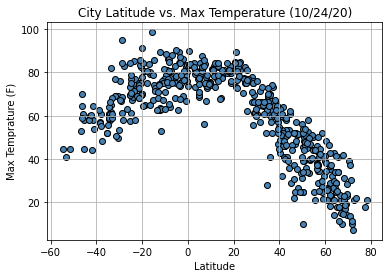

In [48]:
# Plot 1: Latitude vs. Temperature Plot
x_values = lat
y_values = max_temp

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Max Temprature (F)')
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../Images/lat_vs_temp.png")
plt.show()

## Latitude vs. Humidity Plot

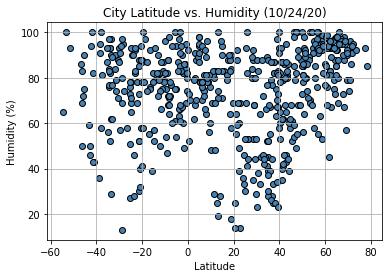

In [49]:
# Plot 2: Latitude vs. Humidity Plot
x_values = lat
y_values = humid

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../Images/lat_vs_humid.png")
plt.show()

## Latitude vs. Cloudiness Plot

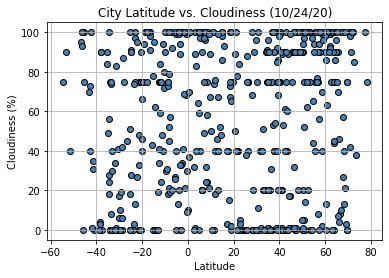

In [50]:
# Plot 3: Latitude vs. Cloudiness Plot
x_values = lat
y_values = cloud

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../Images/lat_vs_cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

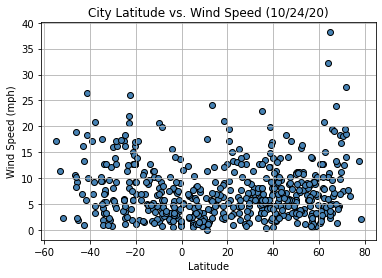

In [51]:
# Plot 4: Latitude vs. Wind Speed Plot
x_values = lat
y_values = wind

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../Images/lat_vs_wind.png")
plt.show()

## Linear Regression

In [52]:
# Creating northern and southern hemisphere dataframe for linear regression:

north_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
south_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The p-value is: 2.523328067672281e-130
The r-value is: -0.8988602588394674


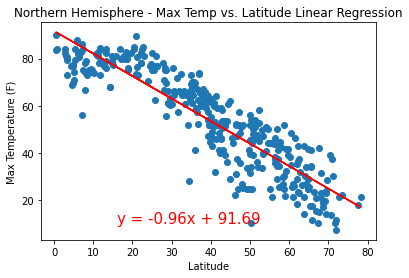

In [53]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression: 
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 1: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/north_temp_lg.png")
plt.show() 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The p-value is: 5.398607501189871e-24
The r-value is: 0.655785657476248


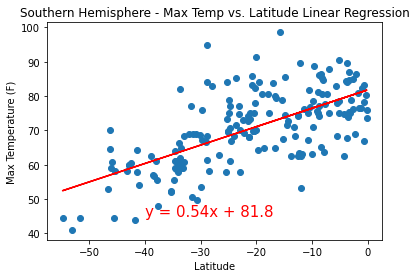

In [54]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression:
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 2: Southern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/south_temp_lg.png")
plt.show()

## After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

***
## First pair:
### Comparing the linear regression of temperatures at changing latitudes in the northern vs southern hemisphere:

> The linear regression is modeling what happens to temperature as latitudes increase in the northern and southern hemispheres. In addition, this means that for the northern hemisphere as latitude increases you move further away from the equator. On the other hand, in the southern hemisphere latitudes decrease as we move away from the equator. For the northern hemisphere there is a significant negative correlation between latitude and maximum temperature. Whereas, in the southern hemisphere there is a positive correlation between latitude and maximum temperature.  
***

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The p-value is: 1.321095301535627e-08
The r-value is: 0.2939175197434048


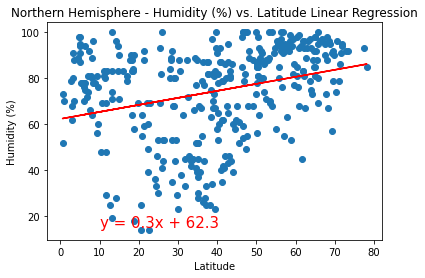

In [55]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 3: Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/north_humidity_lg.png")
plt.show() 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The p-value is: 0.478436359565089
The r-value is: 0.052577027954518955


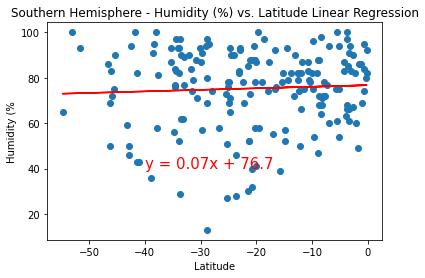

In [56]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 4: Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/south_humidity_lg.png")
plt.show()

***
## Second pair:
### Comparing the linear regression of humidity at changing latitudes in the northern vs southern hemisphere:

> The linear regression is modeling what happens to humidity as latitude increases in the northern and southern hemispheres. As latitude increases for the northern hemisphere we move further away from the equator, and as latitude increases for the southern hemisphere we move closer to the equator. 
As latitude increases in the northern hemisphere so does humidity, which means there is a positive correlation. There is no significant correlation between latitudes and humidity in the southern hemisphere. 
***



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The p-value is: 0.0072063099250403995
The r-value is: 0.14140507437090966


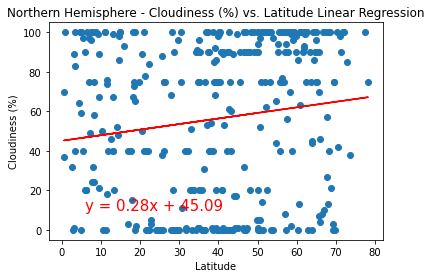

In [57]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 5: Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/north_cloud_lg.png")
plt.show() 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The p-value is: 0.0703760088753889
The r-value is: 0.1337084223809311


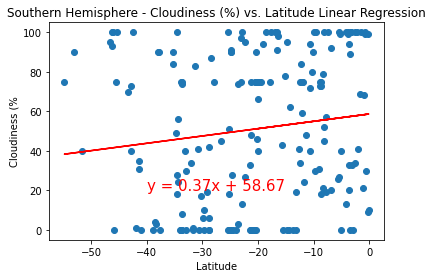

In [58]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression:
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 6: Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/south_cloud_lg.png")
plt.show()

***
## Third pair:
### Comparing the linear regression of cloudiness at changing latitudes in the northern vs southern hemisphere:
> The linear regression is modeling what happens to cloudiness as latitudes increase in the northern and southern hemispheres. As latitude increases for the northern hemisphere we move further away from the equator, and as latitude increases for the southern hemisphere we move closer to the equator. For the northern hemisphere, increases in latitude appear to be weakly related to increases in cloudiness, but there is significant positive relationship/correlation. On the other hand, there is no relationship between latitude and cloudiness in the southern hemisphere.
***

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The p-value is: 3.4414193702357424e-05
The r-value is: 0.21646678390715757


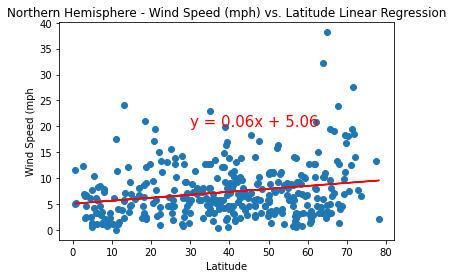

In [59]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression:
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 7: Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/north_wind_lg.png")
plt.show() 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The p-value is: 0.0002540730647196743
The r-value is: -0.26659949699361324


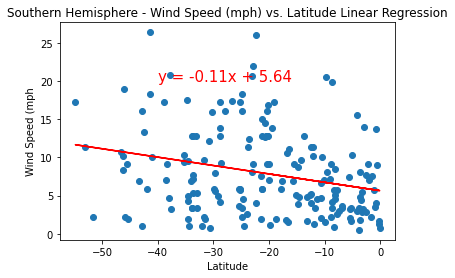

In [60]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression: 
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 8: Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/south_wind_lg.png")
plt.show() 

***
## Forth pair:
### Comparing the linear regression of wind speed at changing latitudes in the northern vs southern hemisphere:
> The linear regression is modeling what happens to wind speed as latitudes increase in the northern and southern hemispheres. As latitude increases for the northern hemisphere we move further away from the equator, and as latitude increases for the southern hemisphere we move closer to the equator. In the northern hemisphere, although the relationship between increasing latitude and wind speed is significant (based on the p-value), there only appears to be a weak correlation. On the other hand, in the southern hemisphere there is no correlation between the increasing latitude and wind speed. 
***

## Written description of three observable trends based on the data:
>* For regions that are close to the equator there is a trend of increased temperature for both the northern and southern hemispheres. This is reasonable given the progressive distance from the equator both north and south, respectively.   
>* Across both the northern and southern hemispheres humidity is mostly over 60%, and it trends opposite to temperature, which is accurate given relative humidity increases with decreasing temperature.  
>* For both hemispheres wind speed was generally below 20 miles per hour irrespective of latitude. This appears reasonable given wind speed is determined by pressure differentials across regions and not latitutde. 
>* Cloudiness across both hemispheres was variable and displayed no pattern based on latitude, this is similar to wind speed. 
****